In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
# Import the cleaned dataset after web-scraping

df = pd.read_excel('Cleaned Combine Dataset.xlsx')

In [3]:
# Take a look at the data

df.head()

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,AP Count
0,John Abraham,OLB,South Carolina,76.0,252.0,4.55,0.0,0,0,0.00,0.00,4
1,Shaun Alexander,RB,Alabama,72.0,218.0,4.58,0.0,0,0,0.00,0.00,2
2,Darnell Alford,OT,Boston Col.,76.0,334.0,5.56,25.0,23,94,8.48,4.98,0
3,Rashard Anderson,CB,Jackson State,74.0,206.0,4.55,34.0,0,123,7.18,4.15,0
4,LaVar Arrington,OLB,Penn State,75.0,250.0,4.53,0.0,0,0,0.00,0.00,3


In [4]:
# Drop the player column

df = df.drop('Player', axis=1)

In [5]:
# Determine the correlations between the numerical features

df_dropap = df.drop('AP Count',axis=1)
corr = df_dropap.corr()
print(corr)

                  Ht        Wt      40yd  Vertical     Bench  Broad Jump  \
Ht          1.000000  0.717674  0.122800 -0.111306  0.152400   -0.088964   
Wt          0.717674  1.000000  0.224180 -0.149779  0.391980   -0.116379   
40yd        0.122800  0.224180  1.000000  0.218421  0.168401    0.242892   
Vertical   -0.111306 -0.149779  0.218421  1.000000  0.167708    0.880012   
Bench       0.152400  0.391980  0.168401  0.167708  1.000000    0.173156   
Broad Jump -0.088964 -0.116379  0.242892  0.880012  0.173156    1.000000   
3Cone       0.109318  0.152416  0.280005  0.584254  0.250546    0.603879   
Shuttle     0.121670  0.164120  0.277728  0.599636  0.251073    0.616710   

               3Cone   Shuttle  
Ht          0.109318  0.121670  
Wt          0.152416  0.164120  
40yd        0.280005  0.277728  
Vertical    0.584254  0.599636  
Bench       0.250546  0.251073  
Broad Jump  0.603879  0.616710  
3Cone       1.000000  0.902958  
Shuttle     0.902958  1.000000  


In [6]:
df_corr =  df_dropap.corr().unstack().sort_values().drop_duplicates()

In [7]:
print(df_corr)

Vertical    Wt           -0.149779
Wt          Broad Jump   -0.116379
Vertical    Ht           -0.111306
Broad Jump  Ht           -0.088964
Ht          3Cone         0.109318
            Shuttle       0.121670
            40yd          0.122800
Bench       Ht            0.152400
Wt          3Cone         0.152416
Shuttle     Wt            0.164120
Bench       Vertical      0.167708
40yd        Bench         0.168401
Broad Jump  Bench         0.173156
Vertical    40yd          0.218421
40yd        Wt            0.224180
            Broad Jump    0.242892
Bench       3Cone         0.250546
            Shuttle       0.251073
Shuttle     40yd          0.277728
40yd        3Cone         0.280005
Wt          Bench         0.391980
Vertical    3Cone         0.584254
            Shuttle       0.599636
Broad Jump  3Cone         0.603879
            Shuttle       0.616710
Wt          Ht            0.717674
Vertical    Broad Jump    0.880012
Shuttle     3Cone         0.902958
Ht          Ht      

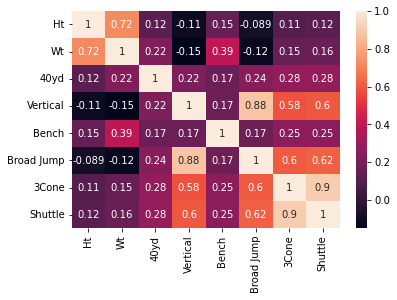

In [8]:
# Visualize the correlations

ax = sns.heatmap(df_dropap.corr(), annot=True)

In [9]:
# Dropping specific highly correlated features

columns_to_drop = ['3Cone','Shuttle','Broad Jump']

df = df.drop(columns=columns_to_drop)

In [10]:
# Creating dummy variables for Position and School

df = pd.get_dummies(df, columns=['Pos','School'], drop_first=True)

In [11]:
# Split the data into features & target variables

y = df['AP Count']
X = df.drop('AP Count', axis=1)

In [12]:
# Split the data into 25:75 testing:training

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
# Scaling the numerical data

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.fit_transform(xtest)

In [14]:
# Fitting the classifier model to the training data

classifier = LogisticRegression(random_state=0, max_iter=1000)
classifier.fit(xtrain, ytrain)

LogisticRegression(max_iter=1000, random_state=0)

In [15]:
# Testing the trained model on the test data

y_pred = classifier.predict(xtest)

In [16]:
# Creat & print the confusion matrix

cm = confusion_matrix(ytest,y_pred)
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1097    6    0    0    0    0    0    2    0    1]
 [  71    0    0    0    0    0    0    0    0    0]
 [  22    0    0    0    0    0    0    0    0    0]
 [  13    1    0    0    0    0    0    0    0    0]
 [   6    0    0    0    0    0    0    0    0    0]
 [   9    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0    0    0]]


In [17]:
# What is the accuracy?

print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.8882591093117409


In [21]:
# What features are the most impactful to the model?

coefficients = np.exp(classifier.coef_[0])

sorted_indices = sorted(range(len(coefficients)), key=lambda k: abs(coefficients[k]), reverse=True)

feature_names = X.columns
sorted_feature_names = [feature_names[i] for i in sorted_indices]


for feature_name, coefficient in zip(sorted_feature_names, coefficients[sorted_indices]):
    print(f"{feature_name}: {coefficient}")

Pos_OL: 1.3481402596933354
School_Hawaii: 1.2874571140088853
Pos_DL: 1.2871466757665637
Pos_EDGE: 1.2834396324231825
School_Washington State: 1.2696018528840807
School_Louisiana Tech: 1.267619901096328
School_Auburn: 1.265002754609376
School_Virginia: 1.2602815267431429
School_West Virginia: 1.2390369180967546
Pos_DT: 1.2279885182602512
School_Utah State: 1.2224827186927394
School_Colorado State: 1.2193652964301622
School_Tulane: 1.201332662130298
Pos_LB: 1.2010572556753205
School_Ohio St.: 1.1961337417735383
School_Minnesota: 1.1929498228854798
School_South Florida: 1.1826588311428854
School_San Jose State: 1.1784836296819219
School_Illinois: 1.177707339837364
School_Appalachian State: 1.1774261790085356
School_Syracuse: 1.1741625996544744
Pos_OT: 1.1717899878839506
School_BYU: 1.1656031491069334
School_Texas Tech: 1.161494198768451
School_Clemson: 1.1614275579673854
School_Tulsa: 1.1574929949062138
School_Ohio: 1.1558729929470055
School_UCLA: 1.1549658488186898
School_San Diego State